In [2]:
import pandas
import os
import json
with open('player_rating.json', 'r') as f:
    player_rating = json.loads(f.read())


class OptaData:
    def __init__(self, base_path):
        """
        Initialize training/testing data
        """
        self.base_path = base_path
        self.data=self.load_data()
        
         self.X, self.P, self.Y, self.goalkeeper, self.defender, self.midfielder, self.forward, self.csvfile  = self.load_data()

    def get_csv_files(self):
        for root, folders, files in os.walk(self.base_path):
            for file in files:
                if '.csv' in file:
                    yield(root + '/' + file)


    def load_data(self):
        """
        Load data from file
        Args:
        Returns:
        """

        X = []; Y = []; P = []; positions={}; goalkeeper = []; defender = []; midfielder = []; forward = []
        
        label_dict = {}
        with open('columns', 'r') as columns_file:
            columns = columns_file.read().splitlines()
        with open('form_columns', 'r') as form_columns_file:
            form_columns = form_columns_file.read().splitlines()

        for csv_file in self.get_csv_files():
             
            
            df = pandas.read_csv(csv_file, usecols=columns)
            df = df.fillna(value=0.0)
            replace_outcome = {1.0:1.0, 0.0:-1.0}
            df["outcome"].replace(replace_outcome, inplace=True)

            for game_id in df.game_id.unique():
                df_game = df.loc[df['game_id'] == game_id]

                df_position_team = df_game.loc[df['event_type'] == 'Team set up']
                for index, row in df_position_team.iterrows():
                    positions_id = row['player_position'].replace(' ','').split(',')
                    involved = row['involved'].replace(' ','').split(',')
                    for index, position in enumerate(positions_id):
                        if position != 5:
                            positions[float(involved[index])] = position
                df_substitute = df_game.loc[df['event_type'] == 'Player on']
                for index, row in df_substitute.iterrows():
                    if row['player_position']=='Goalkeeper':
                        positions[float(row['player_id'])]=1
                    elif row['player_position'] == 'Defender':
                        positions[float(row['player_id'])] = 2
                    elif row['player_position'] == 'Midfielder':
                        positions[float(row['player_id'])] = 3
                    elif row['player_position'] == 'Forward':
                        positions[float(row['player_id'])] = 4


                for player_id in df_game.player_id.unique():
                    if player_id == 0.0:
                        continue
                    df_player = df.loc[df['player_id'] == player_id]
                    features = []
                    for feature in form_columns:
                        total = (df_player[feature]).sum()
                        if total:
                            success = (df_player[feature]*df_player['outcome']).sum()
                            features.append(success/total)
                        else:
                            features.append(0.0)
                    if str(game_id) in player_rating:
                        if str(player_id) in player_rating[str(game_id)]:
                            arr = [str(game_id), str(player_id)] + features
                            if positions[player_id] == 1:
                                goalkeeper.append(arr)
                            elif positions[player_id] == 2:
                                defender.append(arr)
                            elif positions[player_id] == 3:
                                midfielder.append(arr)
                            elif positions[player_id] == 4:
                                forward.append(arr)

                            X.append(features)
                            P.append(positions[player_id])
                            #Y.append(player_rating[str(game_id)][str(player_id)])
                        else:
                            print ("Player missing : ", game_id, player_id)
                    else:
                        print ("Game missing : ", game_id)
            return X, P, Y, goalkeeper, defender, midfielder, forward, csv_file





od = OptaData('./data1/Full Datasets - Opta/MLS')
print(od.X)

('Player missing : ', 968456, 196762.0)
('Player missing : ', 968456, 69194.0)
('Player missing : ', 968456, 45120.0)
('Player missing : ', 968456, 95321.0)
('Player missing : ', 968455, 153390.0)
('Player missing : ', 968454, 40275.0)
('Player missing : ', 968454, 78016.0)
('Player missing : ', 968453, 56812.0)
('Player missing : ', 968453, 88812.0)
('Player missing : ', 968452, 244879.0)
('Player missing : ', 968452, 443009.0)
('Player missing : ', 968452, 245035.0)
('Player missing : ', 968452, 220877.0)
('Player missing : ', 968452, 43684.0)
('Player missing : ', 968451, 423553.0)
('Player missing : ', 968451, 98925.0)
('Player missing : ', 968450, 45120.0)
('Player missing : ', 968450, 95321.0)
('Player missing : ', 968450, 69194.0)
('Player missing : ', 968450, 196762.0)
('Player missing : ', 968449, 91373.0)
('Player missing : ', 968447, 212993.0)
('Player missing : ', 968447, 20525.0)
('Player missing : ', 968447, 28580.0)
('Player missing : ', 968447, 245764.0)
('Player missin

('Player missing : ', 968397, 20525.0)
('Player missing : ', 968397, 202361.0)
('Player missing : ', 968397, 245764.0)
('Player missing : ', 968397, 41599.0)
('Player missing : ', 968397, 111847.0)
('Player missing : ', 968397, 424995.0)
('Player missing : ', 968396, 49841.0)
('Player missing : ', 968396, 163484.0)
('Player missing : ', 968396, 62839.0)
('Player missing : ', 968396, 114579.0)
('Player missing : ', 968395, 200735.0)
('Player missing : ', 968395, 245009.0)
('Player missing : ', 968394, 69194.0)
('Player missing : ', 968394, 196762.0)
('Player missing : ', 968394, 95321.0)
('Player missing : ', 968394, 45120.0)
('Player missing : ', 968393, 88812.0)
('Player missing : ', 968393, 56812.0)
('Player missing : ', 968392, 43684.0)
('Player missing : ', 968392, 220877.0)
('Player missing : ', 968392, 55209.0)
('Player missing : ', 968392, 41625.0)
('Player missing : ', 968391, 69194.0)
('Player missing : ', 968391, 45120.0)
('Player missing : ', 968391, 95321.0)
('Player missin

('Player missing : ', 968334, 86155.0)
('Player missing : ', 968333, 55209.0)
('Player missing : ', 968333, 60032.0)
('Player missing : ', 968333, 159702.0)
('Player missing : ', 968333, 41625.0)
('Player missing : ', 968333, 198884.0)
('Player missing : ', 968332, 40275.0)
('Player missing : ', 968329, 102921.0)
('Player missing : ', 968328, 60032.0)
('Player missing : ', 968327, 17279.0)
('Player missing : ', 968327, 98925.0)
('Player missing : ', 968326, 220877.0)
('Player missing : ', 968326, 116185.0)
('Player missing : ', 968325, 200735.0)
('Player missing : ', 968324, 212993.0)
('Player missing : ', 968324, 110954.0)
('Player missing : ', 968324, 60318.0)
('Player missing : ', 968323, 20525.0)
('Player missing : ', 968323, 41599.0)
('Player missing : ', 968323, 82845.0)
('Player missing : ', 968323, 202361.0)
('Player missing : ', 968323, 77755.0)
('Player missing : ', 968323, 151933.0)
('Player missing : ', 968323, 223256.0)
('Player missing : ', 968323, 245764.0)
('Player miss

('Player missing : ', 965463, 153390.0)
('Player missing : ', 965462, 56812.0)
('Player missing : ', 965461, 77755.0)
('Player missing : ', 965461, 20525.0)
('Player missing : ', 965461, 82845.0)
('Player missing : ', 965461, 443002.0)
('Player missing : ', 965461, 202361.0)
('Player missing : ', 965461, 223256.0)
('Player missing : ', 965461, 245764.0)
('Player missing : ', 965461, 423123.0)
('Player missing : ', 965461, 41599.0)
('Player missing : ', 965460, 60032.0)
('Player missing : ', 965458, 245035.0)
('Player missing : ', 965458, 220877.0)
('Player missing : ', 965458, 43684.0)
('Player missing : ', 965457, 212993.0)
('Player missing : ', 965457, 244768.0)
('Player missing : ', 965457, 110954.0)
('Player missing : ', 965457, 211988.0)
('Player missing : ', 965456, 95321.0)
('Player missing : ', 965455, 149669.0)
('Player missing : ', 965455, 55209.0)
('Player missing : ', 965455, 41625.0)
('Player missing : ', 965454, 159537.0)
('Player missing : ', 965454, 49841.0)
('Player mi

AttributeError: OptaData instance has no attribute 'X'

In [1]:
csv_file=csv_file.replace('/','')
with open("gk"+csv_file+".txt", "w") as text_file:
    text_file.write("%s\n" % od.goalkeeper)

with open("def"+csv_file+".txt", "w") as text_file:
    text_file.write("%s\n" % od.defender)

with open("midf"+csv_file+".txt", "w") as text_file:
    text_file.write("%s\n" % od.midfielder)

with open("fwd"+csv_file+".txt", "w") as text_file:
    text_file.write("%s\n" % od.forward)

NameError: name 'csv_file' is not defined

In [2]:
print od.csv_file

NameError: name 'od' is not defined

0   -0.151515
1   -0.142857
2   -0.025000
3   -0.142857
4   -0.107822
5    0.012658
6   -0.384615
7   -0.219512
Name: f1, dtype: float64


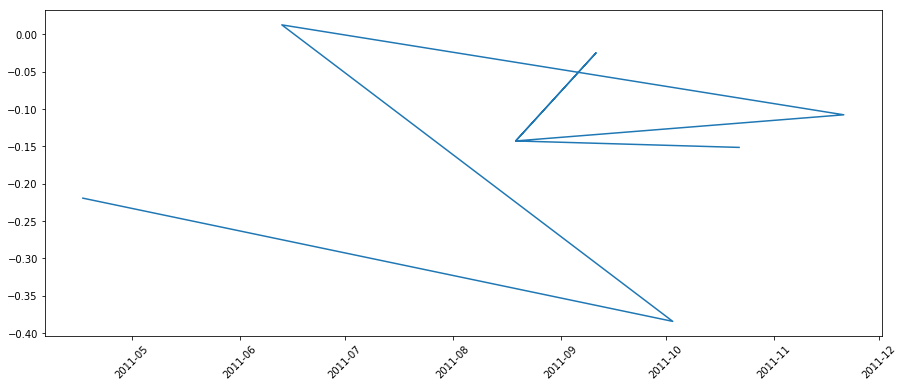

In [142]:
gkx=pd.read_csv(r'C:\Users\Pramod\Downloads\temp\gk11.csv',sep=',',header=None)
df=pd.read_csv(r'C:\Users\Pramod\Downloads\temp\midf11.csv', sep=',',header=None)
df=pd.read_csv(r'C:\Users\Pramod\Downloads\temp\def11.csv', sep=',',header=None)
df=pd.read_csv(r'C:\Users\Pramod\Downloads\temp\fwd11.csv', sep=',',header=None)


gk['date'] = pd.to_datetime(gkx[0], format='%Y.%m.%d')

gk['f1']= gkx[1]

print gk['f1']

from matplotlib import pyplot as plt

plt.plot(gk['date'], gk['f1'], '-')
_ = plt.xticks(rotation=45)


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


defn=pd.read_csv(r'C:\Users\Pramod\Downloads\temp1\def13.csv',parse_dates=[2], index_col=2, sep=',',header=None)
defn

,0,1,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
2,,,,,,,,,,,,,,,,,,,,,
2018-07-12,968457,180593,1.000000,0.000000,-1.000000,0,0.000000,0.0,0,1,...,0,0,0,-1,0,0,0,0,0,0
2018-07-08,968453,50122,0.000000,0.000000,0.000000,0,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-07-08,968451,50081,-0.250000,-0.666667,-1.000000,0,0.000000,-1.0,0,1,...,0,0,0,-1,0,0,0,0,0,0
2018-07-08,968451,54862,-0.333333,0.000000,0.000000,0,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-07-08,968450,20491,1.000000,-1.000000,0.000000,0,0.000000,0.0,0,0,...,0,0,0,-1,0,0,0,0,0,0
2018-07-08,968449,114236,-0.142857,-1.000000,-1.000000,0,1.000000,-1.0,0,0,...,0,0,0,-1,0,0,0,0,0,1
2018-07-07,968447,83378,0.000000,0.000000,-1.000000,0,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-07-08,968446,200844,0.000000,0.000000,1.000000,0,0.000000,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2018-07-08,968446,133584,0.000000,-1.000000,0.000000,0,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


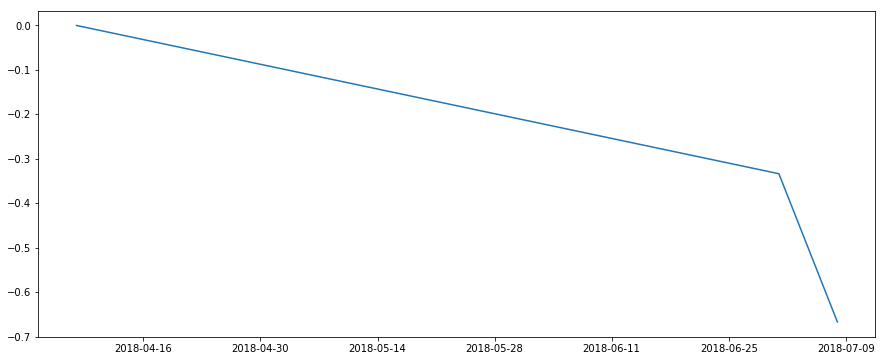

In [110]:
defnx=defn.loc[defn[1]==50081]
defnxx=defnx[[4]]
plt.plot(defnxx)

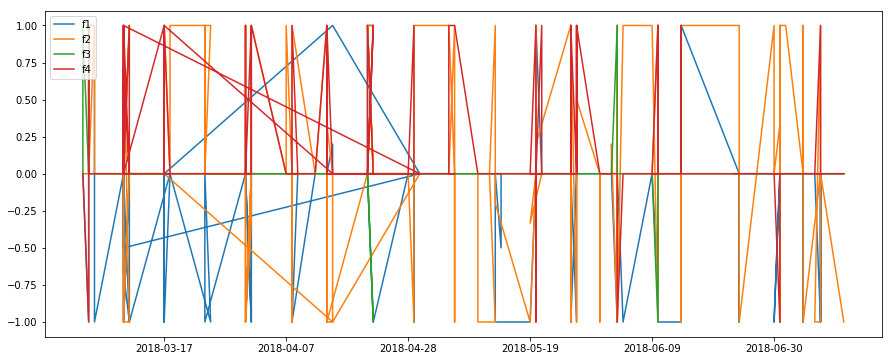

In [131]:
defn1=defn[[4]]
defn2=defn[[5]]
defn3=defn[[6]]
defn4=defn[[7]]

plt.plot(defn1)
plt.plot(defn2)
plt.plot(defn3)
plt.plot(defn4)
plt.legend(['f1', 'f2','f3','f4'], loc='upper left')

plt.show()
